참고자료  
https://tobigs.gitbook.io/tobigs/data-analysis/undefined-3/python-2-1

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('빵 특성 수치화eng(10.27).xlsx')
df.head()
del df['빵 종류']

In [3]:
#row 18개
#col 11개
df.shape

(18, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   dessert   18 non-null     int64
 1   meal      18 non-null     int64
 2   chock     18 non-null     int64
 3   basak     18 non-null     int64
 4   jjonduck  18 non-null     int64
 5   soft      18 non-null     int64
 6   goso      18 non-null     int64
 7   damback   18 non-null     int64
 8   dalkom    18 non-null     int64
 9   gguduck   18 non-null     int64
 10  zzapzzal  18 non-null     int64
dtypes: int64(11)
memory usage: 1.7 KB


In [6]:
df.isnull().sum()

dessert     0
meal        0
chock       0
basak       0
jjonduck    0
soft        0
goso        0
damback     0
dalkom      0
gguduck     0
zzapzzal    0
dtype: int64

In [7]:
# kmeans, dbscan 등은 거리기반 알고리즘이기 때문에 단위의 영향력을 제거하기 위해 표준화 진행
# 여기서는 (x-mean)/std로 변환하여 평균0, 표준편차1로 scaling을 맞춰주는 standardScaler를 사용

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns) # scaled된 데이터

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

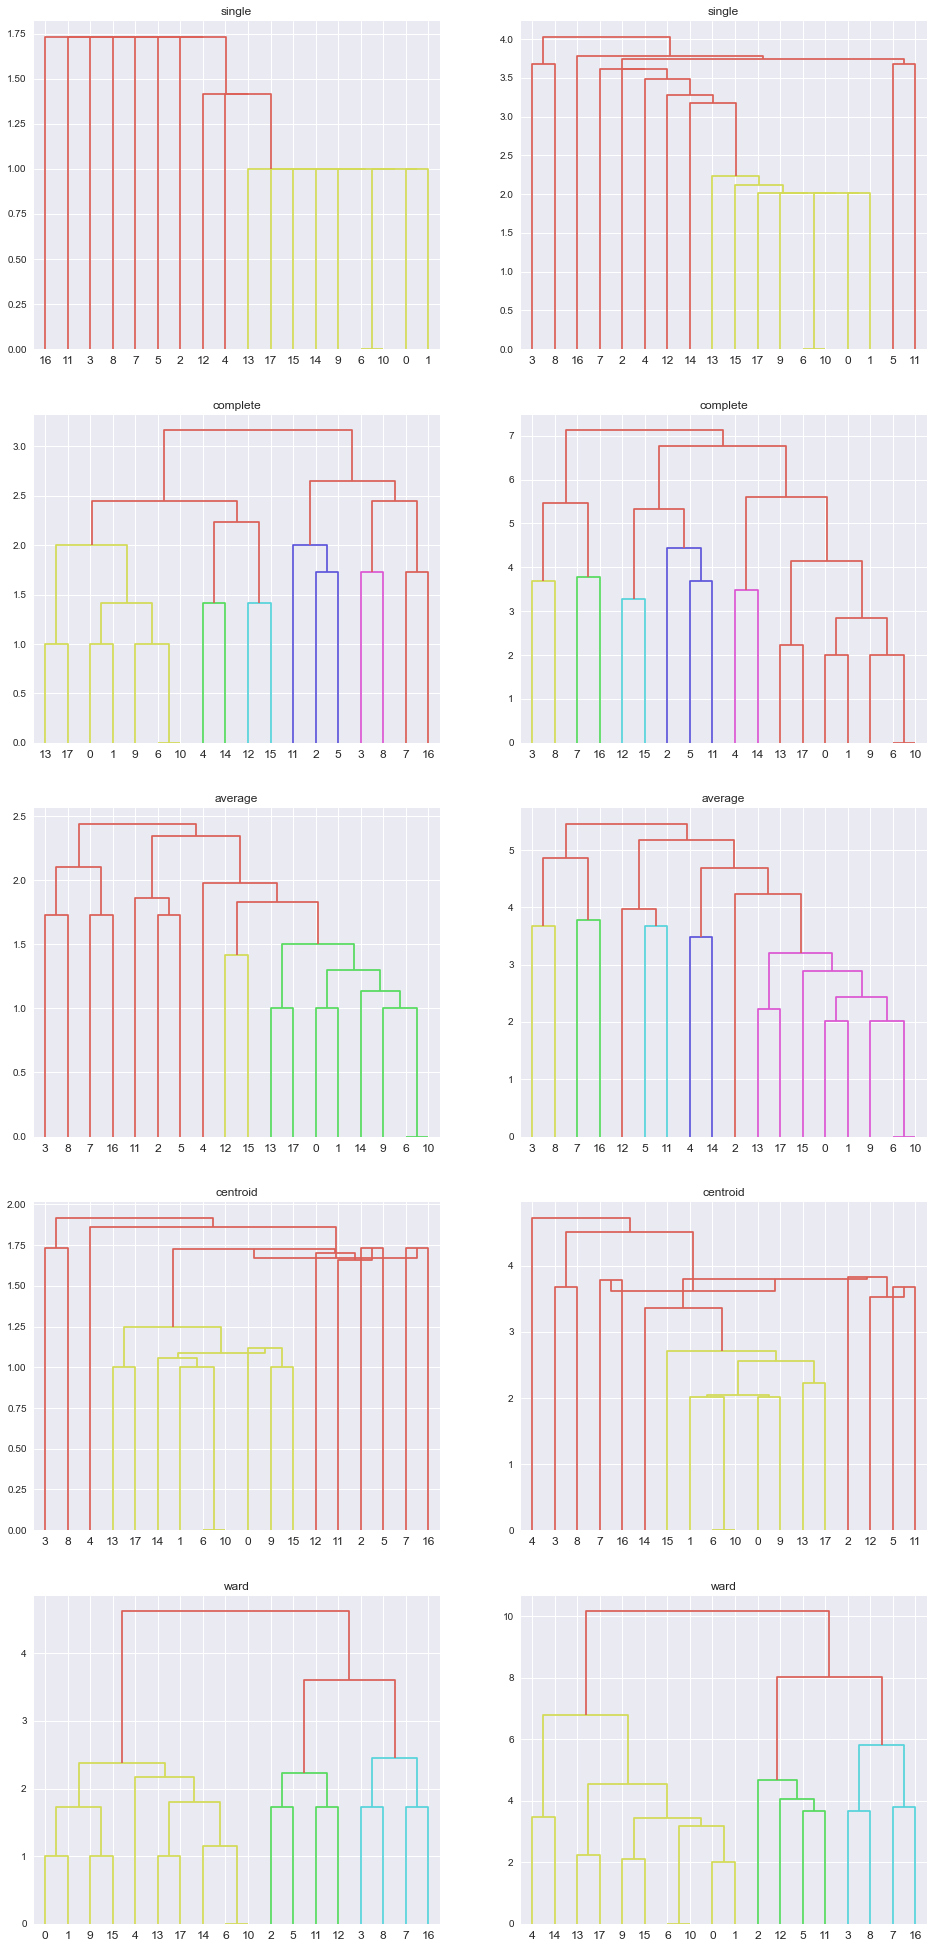

In [11]:
# 왼쪽은 scaling 적용 X 데이터, 오른쪽은 scaling 적용 O 데이터
# 순서대로 single linkage, complete linkage, average linkage, centroid linkage, ward linkage 적용해보았다.
# 거리를 기준으로 proximity matrix를 만들고 이에 따라 cluster를 키워 나가는데,
# 군집 간 거리를 측정하는 방식이 달라지니 군집화가 이루어진 결과도 확연히 차이가 났다.

linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']
data = [df,scaled_df]

fig, axes = plt.subplots(nrows=len(linkage_list), ncols=2, figsize=(16, 35))
for i in range(len(linkage_list)):
    for j in range(len(data)):
        hierarchical_single = linkage(data[j], method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i][j])
        axes[i][j].title.set_text(linkage_list[i])
plt.show()

### 계층적 군집화 수행  
https://rfriend.tistory.com/206?category=706119
### [linkage 리스트]
single linkage - 단일 연결법  
complete linkage - 완전 연결법  
두 군집 간의 거리를 측정할 때 각 군집의 중심(centroid) 간의 거리를 사용  
average linkage - 평균 연결법  
centroid linkage - 중심 연결법  
ward linkage - ward 연결법

In [16]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')
labels = agg_clustering.fit_predict(df)

In [21]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df)

KMeans(n_clusters=6)

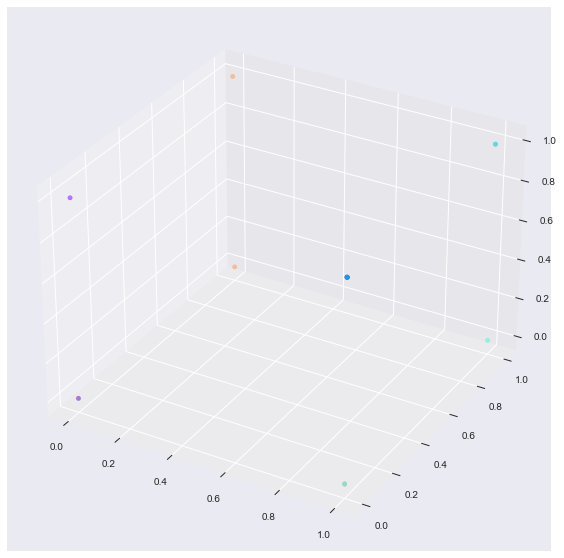

In [25]:
#test
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = df['dessert']
y = df['meal']
z = df['chock']
ax.scatter(x, y, z, c = kmeans.labels_, s= 20, alpha=0.5, cmap='rainbow')

In [26]:
# 군집의 적정 수 확인하기

def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(df)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

In [28]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

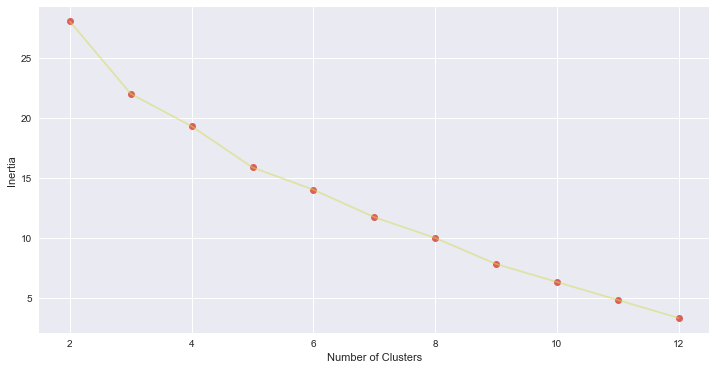

In [29]:
change_n_clusters(n_clusters, df)
# 급격히 떨어지는 구간(elbow point)이 적절구간이라고 설명함

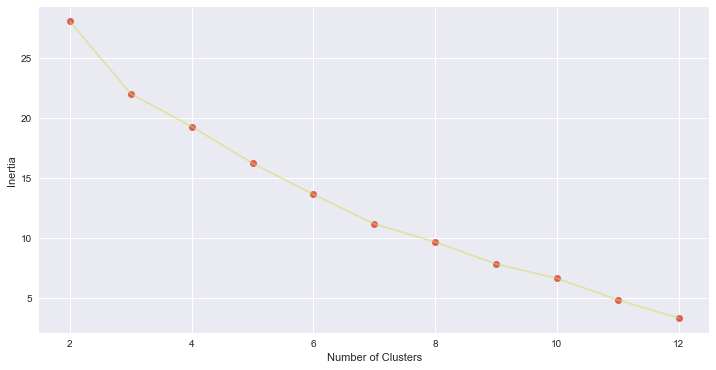

In [30]:
change_n_clusters(n_clusters, scaled_df)